# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

## <b> Mounting the Google Drive </b>

In [ ]:
# Mounting the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## <b> Importing Libraries </b>

In [ ]:
# Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## <b> Loading Datasets </b>

In [ ]:
# Loading the Datasets
# Rossmann Stores Data.csv - Historical Data including Sales
file_path_1 = '/content/drive/MyDrive/AlmaBetter/Capstone Projects /Retail Sales Prediction - Pushpam Raghuvanshi/Data & Resources/Rossmann Stores Data.csv'
df1 = pd.read_csv(file_path_1, parse_dates = True, index_col = 'Date')
# store.csv - Supplemental information about the stores
file_path_2 = '/content/drive/MyDrive/AlmaBetter/Capstone Projects /Retail Sales Prediction - Pushpam Raghuvanshi/Data & Resources/store.csv'
df2 = pd.read_csv(file_path_2)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## <b> Overview of Datasets </b>

In [ ]:
# Checking how big the data is and how data looks for Rossmann Store.csv (df1)
print('Number of records and features', df1.shape)
df1.head()

Number of records and features (1017209, 8)


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


In [ ]:
# Checking how big the data is and how data looks for store.csv (df2)
print('Number of records and features', df2.shape)
df2.head()

Number of records and features (1115, 10)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
# Summary of Rossmann Store.csv (df1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2015-07-31 to 2013-01-01
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Sales          1017209 non-null  int64 
 3   Customers      1017209 non-null  int64 
 4   Open           1017209 non-null  int64 
 5   Promo          1017209 non-null  int64 
 6   StateHoliday   1017209 non-null  object
 7   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 69.8+ MB


In [ ]:
# Summary of store.csv (df2)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


## <b> Checking for Null Values</b>

In [ ]:
# Analyzing Null Values for both the Datasets
print('df1 \n',df1.isnull().sum(),'\n\n')
print('df2 \n',df2.isnull().sum())

df1 
 Store            0
DayOfWeek        0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64 


df2 
 Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


*   Null values are present in store.csv (df2) dataset.



## <b>Handling Null Values</b>

In [ ]:
# Handling Missing Values
# Replacing NaN values in 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval' by 0
df2['Promo2SinceWeek'] = df2['Promo2SinceWeek'].fillna(0)
df2['Promo2SinceYear'] = df2['Promo2SinceYear'].fillna(0)
df2['PromoInterval'] = df2['PromoInterval'].fillna(0)

# Replacing NaN values in 'CompetitionDistance' with Median 
df2['CompetitionDistance'] = df2['CompetitionDistance'].fillna(df2['CompetitionDistance'].median())

# Replacing NaN values in 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear' with Mode
df2['CompetitionOpenSinceMonth'] = df2['CompetitionOpenSinceMonth'].fillna(df2['CompetitionOpenSinceMonth'].mode().iloc[0])
df2['CompetitionOpenSinceYear'] = df2['CompetitionOpenSinceYear'].fillna(df2['CompetitionOpenSinceYear'].mode().iloc[0])

In [ ]:
# Checking if any Null Value left for any feature
print(df2.isnull().sum())

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64


## <b> Working with 'Date' Column </b>

In [ ]:
# Extracting year, month, day and week of year from "Date"
df1['Year'] = df1.index.year
df1['Month'] = df1.index.month
df1['Day'] = df1.index.day
df1['WeekOfYear'] = df1.index.weekofyear
df1 = df1.reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """


## <b> Checking for Duplicates </b>

In [ ]:
# Checking for duplicates 
print(df1.duplicated().sum())
print(df2.duplicated().sum())

0
0


*   No duplicates are present in both the datasets.



## <b> Merging both the Datasets </b>

In [ ]:
# Joining Both the Dataframes 
rossmann_df = pd.merge(df1, df2, how='left', on='Store')

## <b> Understanding the Dataset </b>

In [ ]:
# Using head function, first 5 rows of Merged dataset
rossmann_df.head()

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,2015-07-31,1,5,5263,555,1,1,0,1,2015,...,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2015-07-31,2,5,6064,625,1,1,0,1,2015,...,31,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,2015-07-31,3,5,8314,821,1,1,0,1,2015,...,31,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,2015-07-31,4,5,13995,1498,1,1,0,1,2015,...,31,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,2015-07-31,5,5,4822,559,1,1,0,1,2015,...,31,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [ ]:
# Using sample function, any random 5 rows of Merged dataset
rossmann_df.sample(5)

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
415706,2014-06-24,597,2,4415,689,1,0,0,0,2014,...,26,a,a,150.0,9.0,2008.0,1,1.0,2012.0,"Mar,Jun,Sept,Dec"
151482,2015-03-18,958,3,3873,529,1,1,0,0,2015,...,12,a,a,440.0,11.0,2013.0,0,0.0,0.0,0
1017115,2013-01-01,1022,2,0,0,0,0,a,1,2013,...,1,a,c,1520.0,9.0,2013.0,0,0.0,0.0,0
334643,2014-09-17,105,3,5007,679,1,1,0,0,2014,...,38,a,c,6190.0,9.0,2013.0,1,23.0,2013.0,"Mar,Jun,Sept,Dec"
966197,2013-02-15,278,5,6324,769,1,0,0,0,2013,...,7,a,c,9260.0,2.0,2010.0,0,0.0,0.0,0


In [ ]:
# Using tail function, last 5 rows of Merged dataset
rossmann_df.tail()

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1017204,2013-01-01,1111,2,0,0,0,0,a,1,2013,...,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,2013-01-01,1112,2,0,0,0,0,a,1,2013,...,1,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1017206,2013-01-01,1113,2,0,0,0,0,a,1,2013,...,1,a,c,9260.0,9.0,2013.0,0,0.0,0.0,0
1017207,2013-01-01,1114,2,0,0,0,0,a,1,2013,...,1,a,c,870.0,9.0,2013.0,0,0.0,0.0,0
1017208,2013-01-01,1115,2,0,0,0,0,a,1,2013,...,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [ ]:
# Using len function, calculating the no. of records in the datset
len(rossmann_df)

1017209

In [ ]:
# Using columns attribute, list of features/columns name in the dataset
rossmann_df.columns

Index(['Date', 'Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day', 'WeekOfYear',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
# Checking for duplicates in the merged dataset
rossmann_df.duplicated().sum()

0

In [ ]:
# Summary of merged dataset
rossmann_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 22 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Date                       1017209 non-null  datetime64[ns]
 1   Store                      1017209 non-null  int64         
 2   DayOfWeek                  1017209 non-null  int64         
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   Year                       1017209 non-null  int64         
 10  Month                      1017209 non-null  int64         
 11  Day                        1017209 no

## <b> Changing Datatype of some columns </b>

In [ ]:
# Changing datatype of some columns
rossmann_df['CompetitionOpenSinceMonth'] = rossmann_df['CompetitionOpenSinceMonth'].astype(int)
rossmann_df['CompetitionOpenSinceYear'] = rossmann_df['CompetitionOpenSinceYear'].astype(int)
rossmann_df['Promo2SinceWeek'] = rossmann_df['Promo2SinceWeek'].astype(int)
rossmann_df['Promo2SinceYear'] = rossmann_df['Promo2SinceYear'].astype(int)

In [ ]:
# Description of Numerical columns/features
rossmann_df.describe().round(2)

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,WeekOfYear,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1017209.00,1017209.0,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.0,1017209.00,1017209.00
mean,558.43,4.0,5773.82,633.15,0.83,0.38,0.18,2013.83,5.85,15.70,23.62,5422.02,7.79,2010.06,0.5,11.65,1007.01
std,321.91,2.0,3849.93,464.41,0.38,0.49,0.38,0.78,3.33,8.79,14.43,7706.92,2.78,5.34,0.5,15.32,1005.88
min,1.00,1.0,0.00,0.00,0.00,0.00,0.00,2013.00,1.00,1.00,1.00,20.00,1.00,1900.00,0.0,0.00,0.00
25%,280.00,2.0,3727.00,405.00,1.00,0.00,0.00,2013.00,3.00,8.00,11.00,710.00,6.00,2008.00,0.0,0.00,0.00
50%,558.00,4.0,5744.00,609.00,1.00,0.00,0.00,2014.00,6.00,16.00,22.00,2325.00,9.00,2012.00,1.0,1.00,2009.00
75%,838.00,6.0,7856.00,837.00,1.00,1.00,0.00,2014.00,8.00,23.00,35.00,6880.00,9.00,2013.00,1.0,22.00,2012.00
max,1115.00,7.0,41551.00,7388.00,1.00,1.00,1.00,2015.00,12.00,31.00,52.00,75860.00,12.00,2015.00,1.0,50.00,2015.00


## <b> Exploratory Data Analysis </b>

### **Scatter Plot - Sales and Customer**

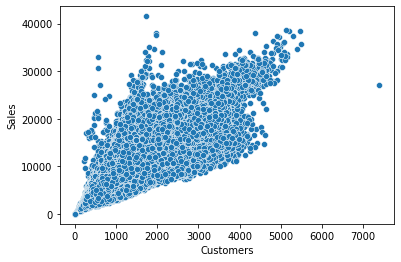

In [ ]:
# Plotting a Scatterplot between Sales and Customers
sns.scatterplot(x = rossmann_df['Customers'], y = rossmann_df['Sales'])

*   Observation - Scatterplot shows that relation between Sales and customer is sort of linear. Sales is increasing with the number of Customers increasing which is obvious.

### **Scatter Plot - Sales and CompetitionDistance**

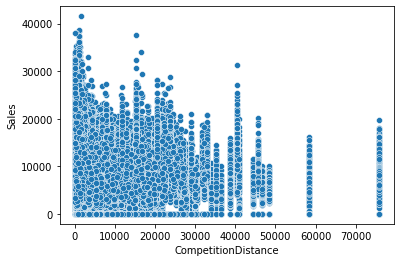

In [ ]:
# Plotting a Scatterplot between Sales and CompetitionDistance
sns.scatterplot(x = rossmann_df['CompetitionDistance'], y = rossmann_df['Sales'])

### **Countplot - Store Open Closed**

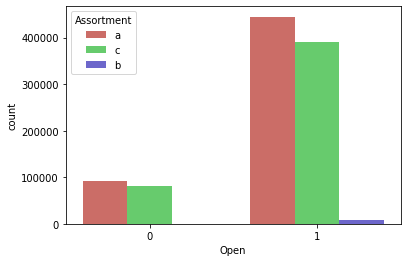

In [ ]:
# Plotting a Countplot of Store Open Closed
sns.countplot(x = rossmann_df["Open"], hue = rossmann_df['Assortment'], palette = 'hls')

Observation - 
1. Some stores of Assortment level 'a' and 'c' are closed.
2. Assortment level 'a' stores are highest.
3. Assortment level 'b' stores are very few.

### **Sales over Year**

Text(0.5, 0, 'Year/Month')

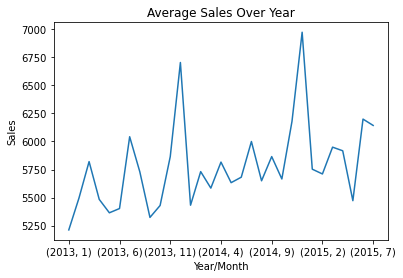

In [ ]:
# Trend of average sales over years
rossmann_df.groupby(['Year', 'Month'])['Sales'].mean().plot.line()
plt.title('Average Sales Over Year')
plt.ylabel('Sales')
plt.xlabel('Year/Month')

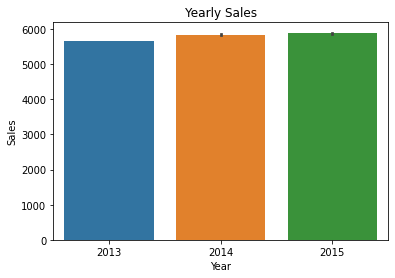

In [ ]:
# Plotting Bar plot showing Total Yearly Sales
sns.barplot(x='Year', y='Sales', data=rossmann_df).set(title='Yearly Sales')
plt.show()

*   Observation - Little increase in sales in successive year.

### **Sales over Month**

Text(0.5, 0, 'Month')

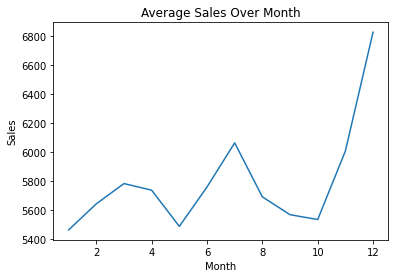

In [ ]:
# Trend of average sales over month
rossmann_df.groupby(['Month'])['Sales'].mean().plot.line()
plt.title('Average Sales Over Month')
plt.ylabel('Sales')
plt.xlabel('Month')

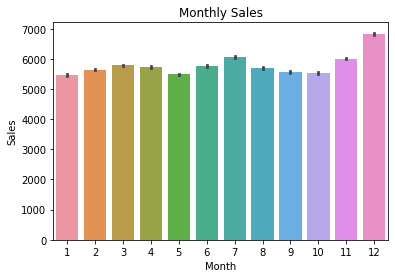

In [ ]:
# Plotting Bar plot showing Total Monthly Sales
sns.barplot(x = 'Month', y = 'Sales', data = rossmann_df).set(title = 'Monthly Sales')
plt.show()

*   Observation - December has the highest sales.

### **Sales vs Promo**

[Text(0.5, 1.0, 'Sales vs Promo')]

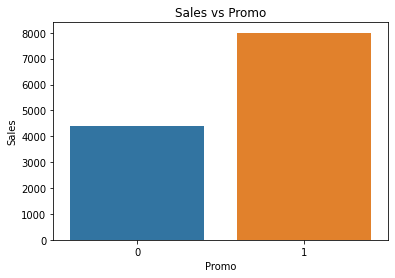

In [ ]:
# Plotting Bar plot showing Sales vs Promo
sns.barplot(x ='Promo',y ='Sales',data = rossmann_df).set(title = 'Sales vs Promo')

*   Observation - More sales when promos are running.

### **Sales vs Assortment**

[Text(0.5, 1.0, 'Assortment vs Sales')]

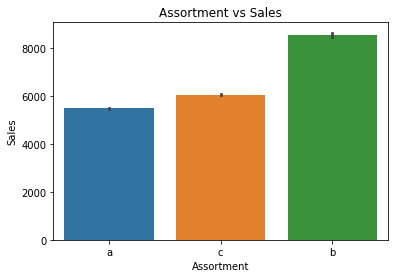

In [ ]:
# Plotting Bar plot showing Sales vs Assortment
sns.barplot(x = 'Assortment', y = 'Sales', data = rossmann_df).set(title = 'Assortment vs Sales')

*   Observation - Asortment Level 'b' has the highest sales and Level 'a' has the lowest sales.

### **Sales vs School Holiday**

[Text(0.5, 1.0, 'Sales vs School Holiday')]

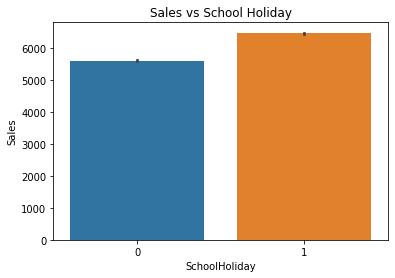

In [ ]:
# Plotting Bar plot showing Sales vs SchoolHoliday
sns.barplot(x = 'SchoolHoliday', y = 'Sales', data = rossmann_df).set(title = 'Sales vs School Holiday')

*   Observation - More sales on School Holidays.

### **Sales vs Day of Week**

[Text(0.5, 1.0, 'Sales vs Day of Week')]

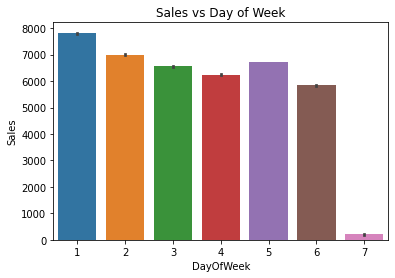

In [ ]:
# Plotting Bar plot showing Sales vs Day of Week
sns.barplot(x = 'DayOfWeek', y = 'Sales',data = rossmann_df).set(title = 'Sales vs Day of Week')

Observation - 
1. More sales on Monday, Tuesday and Friday.
2. Sunday has the lowest sale.

### **Sales vs StoreType**

[Text(0.5, 1.0, 'Sales vs StoreType')]

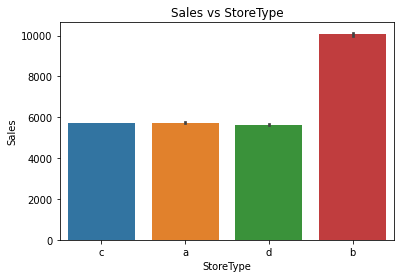

In [ ]:
# Plotting Bar plot showing Sales vs Store Type
sns.barplot(x = 'StoreType', y = 'Sales', data = rossmann_df).set(title = 'Sales vs StoreType')

*   Observation - StoreType 'b' has the highest sales.

### **Proportion of StoreTypes**

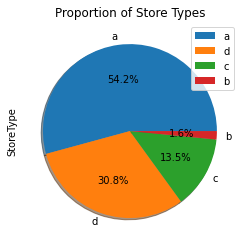

In [ ]:
# Plotting Pie chart showing percentage of Store Types
store_type = rossmann_df['StoreType'].value_counts()
store_type.plot.pie(title='Proportion of Store Types', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()

Observation - 
1. Approximately 50% Stores are of type 'a'.
2. There are only few Stores of type 'b' (1.6%).

### **Customer Proportion per StoreType**

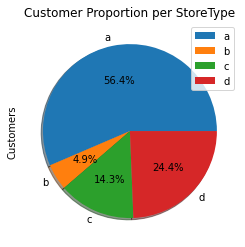

In [ ]:
cust = rossmann_df.groupby('StoreType')['Customers'].sum()
cust.plot.pie(title='Customer Proportion per StoreType', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()

Observation - 
1. Store type 'a' has the most number of customers visit.
2. Very few customers visits Store type 'b'.

## <b> Feature Engineering </b>

In [ ]:
# Making a copy of Dataframe (rossmann_df) and further working on it
final_df  = rossmann_df.copy()

In [ ]:
# Filtering stores which are closed as they wont generate sales
final_df = final_df[final_df.Open != 0]

In [ ]:
# Dropping Open column as it is not a variable anymore
final_df = final_df.drop('Open', axis=1)

In [ ]:
# Stores with zero Sales
final_df[final_df.Sales == 0]['Store'].sum()

31460

In [ ]:
# Percentage of open stored with zero sales
final_df[final_df.Sales == 0]['Store'].sum()/final_df.Sales.sum().round(2) * 100

0.0005356552440563345

In [ ]:
# Filtering rows with Sales > 0
final_df = final_df[final_df.Sales != 0]

In [ ]:
# Checking
final_df[final_df.Sales == 0]['Store'].sum()

0

In [ ]:
# list of columns in final_df dataframe
final_df.columns

Index(['Date', 'Store', 'DayOfWeek', 'Sales', 'Customers', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day', 'WeekOfYear',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
# Description of Numerical columns/features
final_df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Store,844338.0,558.42,321.73,1.0,280.0,558.0,837.0,1115.0
DayOfWeek,844338.0,3.52,1.72,1.0,2.0,3.0,5.0,7.0
Sales,844338.0,6955.96,3103.82,46.0,4859.0,6369.0,8360.0,41551.0
Customers,844338.0,762.78,401.19,8.0,519.0,676.0,893.0,7388.0
Promo,844338.0,0.45,0.50,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,844338.0,0.19,0.40,0.0,0.0,0.0,0.0,1.0
Year,844338.0,2013.83,0.78,2013.0,2013.0,2014.0,2014.0,2015.0
Month,844338.0,5.85,3.32,1.0,3.0,6.0,8.0,12.0
Day,844338.0,15.84,8.68,1.0,8.0,16.0,23.0,31.0
WeekOfYear,844338.0,23.65,14.39,1.0,11.0,23.0,35.0,52.0


In [ ]:
# Summary of final_df
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017190
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Date                       844338 non-null  datetime64[ns]
 1   Store                      844338 non-null  int64         
 2   DayOfWeek                  844338 non-null  int64         
 3   Sales                      844338 non-null  int64         
 4   Customers                  844338 non-null  int64         
 5   Promo                      844338 non-null  int64         
 6   StateHoliday               844338 non-null  object        
 7   SchoolHoliday              844338 non-null  int64         
 8   Year                       844338 non-null  int64         
 9   Month                      844338 non-null  int64         
 10  Day                        844338 non-null  int64         
 11  WeekOfYear                 844338 non-null  int64  

### <b>Dealing with Categorical Variables</b>

In [ ]:
# Nominal Variales
set(final_df.StateHoliday), set(final_df.StoreType), set(final_df.Assortment), set(final_df.PromoInterval)

({0, '0', 'a', 'b', 'c'},
 {'a', 'b', 'c', 'd'},
 {'a', 'b', 'c'},
 {0, 'Feb,May,Aug,Nov', 'Jan,Apr,Jul,Oct', 'Mar,Jun,Sept,Dec'})

In [ ]:
# Converting number 0 to string 0 in StateHoliday column
final_df.loc[final_df.StateHoliday == 0,'StateHoliday'] = final_df.loc[final_df.StateHoliday == 0,'StateHoliday'].astype(str)

In [ ]:
# Converting number 0 to string 0 in StateHoliday column
final_df.loc[final_df.PromoInterval == 0,'PromoInterval'] = final_df.loc[final_df.PromoInterval == '0','PromoInterval'].astype(str)

### **Sales vs State Holiday**

[Text(0.5, 1.0, 'Sales vs StateHoliday')]

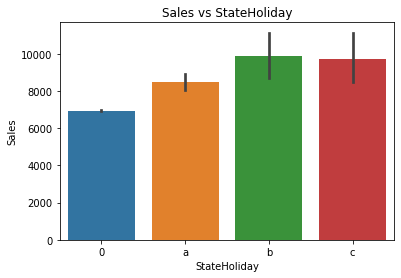

In [ ]:
# Plotting a Bar chart showing Sales vs State Holiday
sns.barplot(x='StateHoliday', y='Sales', data = final_df).set(title='Sales vs StateHoliday')

a = public holiday, b = Easter holiday, c = Christmas, 0 = None

Observation - 
1. More Sales on Easter holiday(b) and Christmas(c).
2. Sales non holiday is less.

In [ ]:
# Encoding all categorical varibale to numeric values
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

final_df['StoreType'] = label_encoder.fit_transform(final_df['StoreType'])
final_df['Assortment'] = label_encoder.fit_transform(final_df['Assortment'])
final_df['StateHoliday'] = label_encoder.fit_transform(final_df['StateHoliday'])
final_df['PromoInterval'] = label_encoder.fit_transform(final_df['PromoInterval'])

final_df.head()

,Date,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,...,WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,2015-07-31,1,5,5263,555,1,0,1,2015,7,...,31,2,0,1270.0,9,2008,0,0,0,3
1,2015-07-31,2,5,6064,625,1,0,1,2015,7,...,31,0,0,570.0,11,2007,1,13,2010,1
2,2015-07-31,3,5,8314,821,1,0,1,2015,7,...,31,0,0,14130.0,12,2006,1,14,2011,1
3,2015-07-31,4,5,13995,1498,1,0,1,2015,7,...,31,2,2,620.0,9,2009,0,0,0,3
4,2015-07-31,5,5,4822,559,1,0,1,2015,7,...,31,0,0,29910.0,4,2015,0,0,0,3


### <b> Multicollinearity </b>

### **Correlation Heatmap**

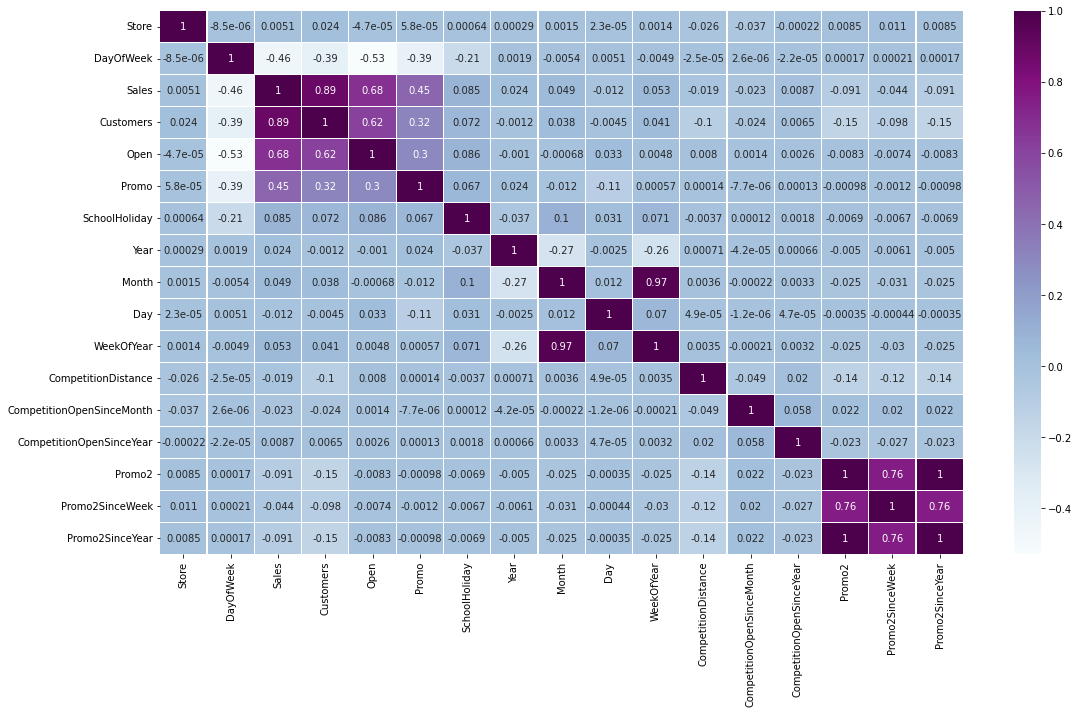

In [ ]:
# Correlation
correlation = rossmann_df.corr()
plt.figure(figsize=(18,10))
sns.heatmap(correlation, annot=True, linewidths=0.2, cmap='BuPu')

Observation - 
1. Sales have high correlation with Customers, Open.
2. Month and WeekOfYear have high correlation 0.97.
3. Promo2 anf Promo2SinceYear have highest correlation = 1.
4. Alo, Promo2 and Promo2SinceWeek have correlation of 1.



In [ ]:
# Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(final_df[[i for i in final_df.describe().columns if i not in ['Sales']]])

,variables,VIF
0,Store,4.031611e+00
1,DayOfWeek,5.770616e+00
2,Customers,5.415796e+00
3,Promo,2.077486e+00
4,StateHoliday,1.004371e+00
5,SchoolHoliday,1.308349e+00
6,Year,1.414599e+05
7,Month,5.707905e+01
8,Day,4.584867e+00
9,WeekOfYear,5.126733e+01


### <b> Boxplot </b>

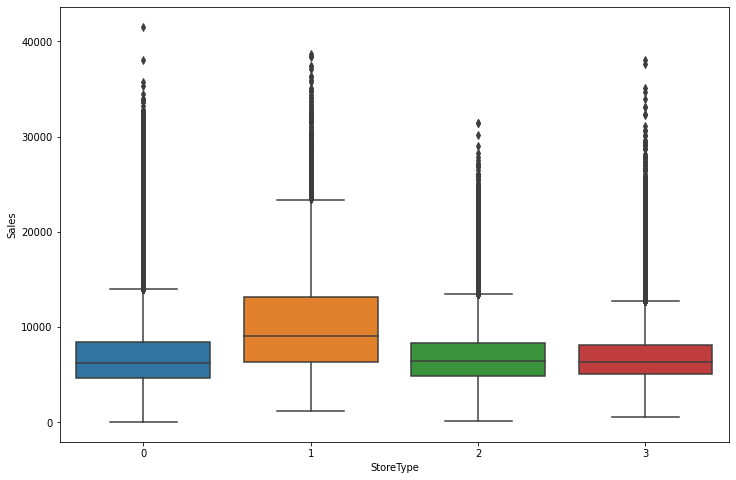

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x = 'StoreType', y = 'Sales', data = final_df)

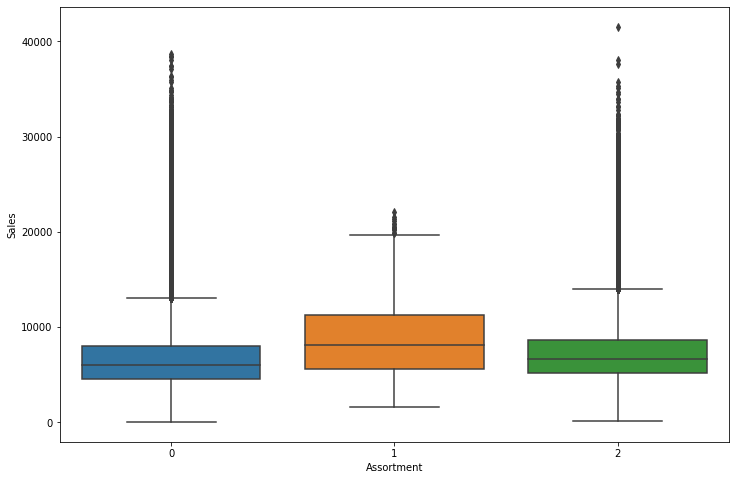

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x = 'Assortment', y = 'Sales', data = final_df)

## <b> Conclusion from EDA </b>

1.   
2.   



# **Rossmann Sales Prediction - ML Model Building**

- This ML Model will predict sales only on stores which are open and when there is some sales because there is no sales when store is closed.

In [ ]:
from scipy.stats import zscore
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score as r2, mean_squared_error as mse
import math
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
# Defining Dependent Variable
dependent_variable = 'Sales'
# Defining Independent Varibale
independent_variables = list(final_df.columns.drop(['Date','Sales','Store']))

In [ ]:
# List of independent variables
independent_variables

['DayOfWeek',
 'Customers',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'Year',
 'Month',
 'Day',
 'WeekOfYear',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval']

In [ ]:
# Creating the data of independent variables
X = final_df[independent_variables].values

# Creating the data of dependent variable
y = final_df[dependent_variable].values

In [ ]:
# Splitting the Dataset into Test and Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
# Shape of train data
print(X_train.shape)
# Shape of test data
print(X_test.shape)

(675470, 18)
(168868, 18)


### **Model - 1 - Linear Regression (OLS)**

In [ ]:
# Fitting Multiple Linear Regression to the Training set
# Formation of equation
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Intercept of equation
regressor.intercept_

-345128.7246962925

In [ ]:
# Coefficients OR Model parameters of equation
regressor.coef_

array([-6.68250445e+01,  6.36639925e+00,  1.28927404e+03, -1.29655171e+03,
        3.73208586e+01,  1.76164646e+02,  4.83488362e+01,  1.26350928e+00,
       -2.01507690e+00,  2.72825866e+02,  2.16569624e+02,  2.83537985e-02,
       -1.34633742e+01, -4.25686165e+00,  1.24371840e+05,  1.01443774e+01,
       -6.19162081e+01, -9.33297059e+01])

In [ ]:
# Predicting the Train set results
y_pred_train = regressor.predict(X_train)

In [ ]:
# Predicting the Test set results
y_pred_test = regressor.predict(X_test)

In [ ]:
# Defining RMSE function
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(x, y):
    return sqrt(mean_squared_error(x, y))

# Defining MAPE function
def mape(x, y): 
    return np.mean(np.abs((x - y) / x)) * 100 

In [ ]:
# Evaluation Metrics for Linear Regression

print("Regresion Model Training Score" , ":" , regressor.score(X_train, y_train),
      "Model Test Score" ,":" , regressor.score(X_test, y_test))

print("Training RMSE", ":", rmse(y_train, y_pred_train),
      "Testing RMSE", ":", rmse(y_test, y_pred_test))

print("Training MAPE", ":", mape(y_train, y_pred_train),
      "Testing MAPE", ":", mape(y_test, y_pred_test))

r2 = r2_score(y_test, y_pred_test)
print("R2 :" ,r2)

Regresion Model Training Score : 0.7651156469492942 Model Test Score : 0.7611592650795743
Training RMSE : 1503.6989257731097 Testing RMSE : 1519.1318498576102
Training MAPE : 15.859354935678846 Testing MAPE : 15.901627612723146
R2 : 0.7611592650795743


Text(0, 0.5, 'Predicted values')

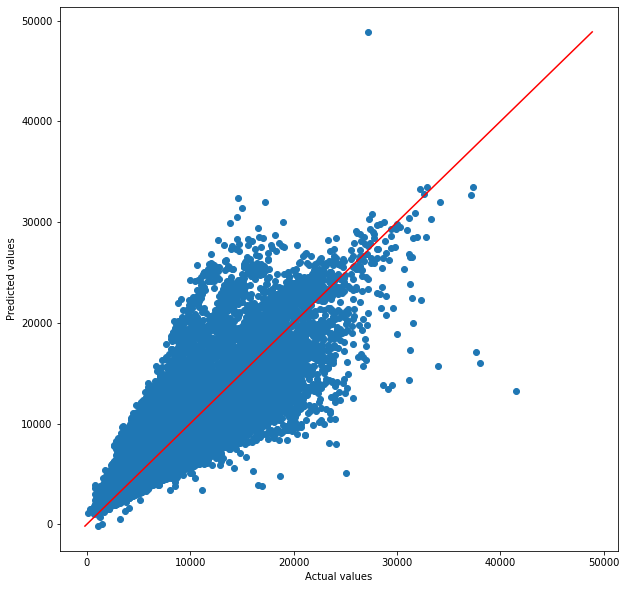

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test,y_pred_test)

p1 = max(max(y_pred_test),max(y_test))
p2 = min(min(y_pred_test),min(y_test))
plt.plot([p1,p2],[p1,p2],c='r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

### **Model - 2 - Lasso Regression (L1)**

In [ ]:
# Fitting Lasso Regression to the Training set
lasso = Lasso(alpha = 0.2, max_iter=10000)
lasso.fit(X_train, y_train)

Lasso(alpha=0.2, max_iter=10000)

In [ ]:
# Predicting the Test set results
y_pred_lasso = lasso.predict(X_test)

In [ ]:
# Predicting the Train set results
y_pred_train_lasso = lasso.predict(X_train)

In [ ]:
# Evaluation Metrics for Lasson Regression (L1)

print("Regresion Model Training Score" , ":" , lasso.score(X_train, y_train),
      "Model Test Score" ,":" , lasso.score(X_test, y_test))

print("Training RMSE", ":", rmse(y_train, y_pred_train_lasso),
      "Testing RMSE", ":", rmse(y_test, y_pred_lasso))

print("Training MAPE", ":", mape(y_train, y_pred_train_lasso),
      "Testing MAPE", ":", mape(y_test, y_pred_lasso))

r2 = r2_score(y_test, y_pred_lasso)
print("R2 :" ,r2)

Regresion Model Training Score : 0.7646132677472557 Model Test Score : 0.7606908289265699
Training RMSE : 1505.3061498267812 Testing RMSE : 1520.6208498391504
Training MAPE : 15.882029797856745 Testing MAPE : 15.920246670740534
R2 : 0.7606908289265699


### **Model - 3 - Ridge Regression (L2)**

In [ ]:
# Fitting Ridge Regression to the Training set
ridge = Ridge(alpha = 0.5)
ridge.fit(X_train, y_train)

Ridge(alpha=0.5)

In [ ]:
# Predicting the Test set results
y_pred_ridge = ridge.predict(X_test)

In [ ]:
# Predicting the Train set results
y_pred_train_ridge = ridge.predict(X_train)

In [ ]:
# Evaluation Metrics for Ridge Regression (L2)

print("Regresion Model Training Score" , ":" , ridge.score(X_train, y_train),
      "Model Test Score" ,":" , ridge.score(X_test, y_test))

print("Training RMSE", ":", rmse(y_train, y_pred_train_ridge),
      "Testing RMSE", ":", rmse(y_test, y_pred_ridge))

print("Training MAPE", ":", mape(y_train, y_pred_train_ridge),
      "Testing MAPE", ":", mape(y_test, y_pred_ridge))

r2 = r2_score(y_test, y_pred_ridge)
print("R2 :" ,r2)

Regresion Model Training Score : 0.76486772907158 Model Test Score : 0.7609335455978095
Training RMSE : 1504.4922854062152 Testing RMSE : 1519.8495177991908
Training MAPE : 15.868983504059067 Testing MAPE : 15.90840099793937
R2 : 0.7609335455978095


### **Model - 4 - Decision Tree**

In [ ]:
# Fitting Decision Tree to the Training set
dt = DecisionTreeRegressor(max_depth=5)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [ ]:
# Predicting the Test set results
y_pred_dt = dt.predict(X_test)

In [ ]:
# Predicting the Train set results
y_train_dt = dt.predict(X_train)

In [ ]:
# Evaluation Metrics for Decision Tree

print("Regresion Model Training Score" , ":" , dt.score(X_train, y_train),
      "Model Test Score" ,":" , dt.score(X_test, y_test))

print("Training RMSE", ":", rmse(y_train, y_train_dt),
      "Testing RMSE", ":", rmse(y_test, y_pred_dt))

print("Training MAPE", ":", mape(y_train, y_train_dt),
      "Testing MAPE", ":", mape(y_test, y_pred_dt))

r2 = r2_score(y_test, y_pred_ridge)
print("R2 :" ,r2)

Regresion Model Training Score : 0.7888292421302908 Model Test Score : 0.7873972039019176
Training RMSE : 1425.774146033609 Testing RMSE : 1433.2625581718194
Training MAPE : 15.449198981158546 Testing MAPE : 15.477798070088266
R2 : 0.7609335455978095


### **Model - 5 - Random Forest**

In [ ]:
# Fitting Random Forest to the Training set
random_forest=RandomForestRegressor(n_estimators =500,max_depth=8)
random_forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, n_estimators=500)

In [ ]:
# Predicting the Test set results
y_pred_rf=random_forest.predict(X_test)

In [ ]:
# Predicting the Train set results
y_pred_train_rf = random_forest.predict(X_train)

In [ ]:
# Evaluation Metrics for Random Forest

print("Regresion Model Training Score" , ":" , random_forest.score(X_train, y_train),
      "Model Test Score" ,":" , random_forest.score(X_test, y_test))

print("Training RMSE", ":", rmse(y_train, y_pred_train_rf),
      "Testing RMSE", ":", rmse(y_test, y_pred_rf))

print("Training MAPE", ":", mape(y_train, y_pred_train_rf),
      "Testing MAPE", ":", mape(y_test, y_pred_rf))

r2 = r2_score(y_test, y_pred_rf)
print("R2 :" ,r2)

Regresion Model Training Score : 0.8710323770616664 Model Test Score : 0.8689062282447169
Training RMSE : 1114.2283225728752 Testing RMSE : 1125.4657916050853
Training MAPE : 12.373150510230536 Testing MAPE : 12.433399939592341
R2 : 0.8689062282447169


In [ ]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}
rfr = RandomForestRegressor(random_state = 1)
g_search = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)
g_search.fit(X_train, y_train);

print(g_search.best_params_)

KeyboardInterrupt: ignored

In [ ]:
# Comparison between actual and predicted values for test set for Random Forest 
dataframe_rf = pd.DataFrame(zip(y_test, y_pred_rf), columns = ['actual', 'predicted'])
dataframe_rf

,actual,predicted
0,6792,5061.662989
1,11585,9656.842343
2,11843,10635.897043
3,11961,11723.731766
4,4657,4463.999715
...,...,...
168863,9680,8519.044266
168864,4252,3896.017376
168865,2581,2723.443793
168866,3757,4257.361065


Text(0, 0.5, 'Predicted values')

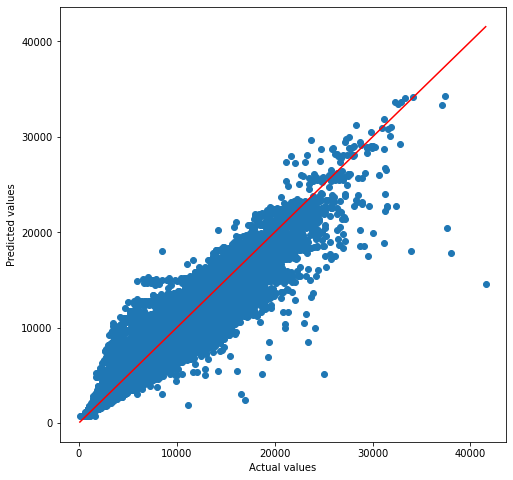

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, y_pred_rf)

p1 = max(max(y_pred_rf),max(y_test))
p2 = min(min(y_pred_rf),min(y_test))
plt.plot([p1,p2],[p1,p2],c='r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

### **Important Features**

In [ ]:
features = X_train.columns
importances = random_forest.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(8,10))
plt.title('Feature Importances', fontsize=20)
plt.barh(range(len(indices)), importances[indices], color='pink', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

AttributeError: ignored